In [8]:
#imports 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from datetime import datetime

In [9]:
#load data
prices1999 = pd.read_csv('data-csv/ResaleFlatPricesBasedonApprovalDate19901999.csv')
prices2012 = pd.read_csv('data-csv/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')
prices2014 = pd.read_csv('data-csv/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv')
prices2017 = pd.read_csv('data-csv/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')

In [10]:
#need to combine all the data
df1999 = prices1999
df2012 = prices2012
df2014 = prices2014
df2017 = prices2017

#drop remaining lease column (because only >2017 has this column will recalculate later)
df2017.drop('remaining_lease', axis='columns', inplace=True)
df = pd.concat([df1999,df2012,df2014,df2017],ignore_index=True)

In [11]:
#not using block number to train model
#also not using street name will just generalise just under town
df.drop('block', axis='columns', inplace=True)
df.drop('street_name', axis='columns', inplace=True)
df.drop('flat_model', axis='columns', inplace=True)

In [12]:
current_year = datetime.now().year
df['remaining_lease (years)'] = 99 - (current_year - df.lease_commence_date) 
df.drop('lease_commence_date',axis='columns',inplace=True)

In [13]:
df['year'] = pd.to_datetime(df['month']).dt.year
df.drop(columns='month', inplace=True)

In [15]:
order = ['town','year','flat_type','storey_range','floor_area_sqm','resale_price','remaining_lease (years)']
df = df.reindex(columns=order)
df

,town,year,flat_type,storey_range,floor_area_sqm,resale_price,remaining_lease (years)
0,ANG MO KIO,1990,1 ROOM,10 TO 12,31.0,9000.0,52
1,ANG MO KIO,1990,1 ROOM,04 TO 06,31.0,6000.0,52
2,ANG MO KIO,1990,1 ROOM,10 TO 12,31.0,8000.0,52
3,ANG MO KIO,1990,1 ROOM,07 TO 09,31.0,6000.0,52
4,ANG MO KIO,1990,3 ROOM,04 TO 06,73.0,47200.0,51
...,...,...,...,...,...,...,...
885418,YISHUN,2024,5 ROOM,07 TO 09,112.0,660000.0,90
885419,YISHUN,2024,5 ROOM,01 TO 03,112.0,585000.0,75
885420,YISHUN,2024,5 ROOM,13 TO 15,112.0,673800.0,90
885421,YISHUN,2024,5 ROOM,07 TO 09,112.0,725000.0,93


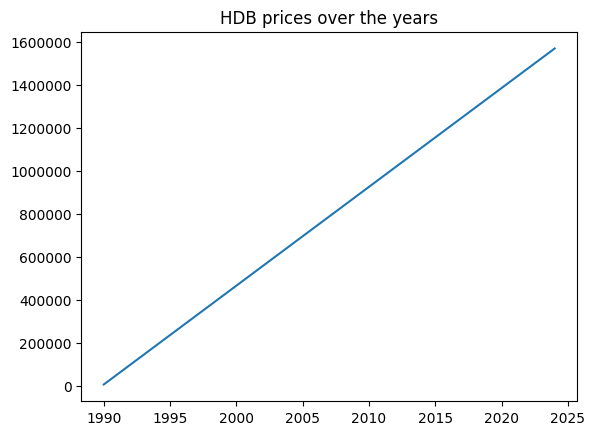

In [18]:
#plot graph price to year 
x_coor = np.array([df.year.min(), df.year.max()])
y_coor = np.array([df.resale_price.min(),df.resale_price.max()])

plt.plot(x_coor, y_coor)
plt.ticklabel_format(style='plain', axis='y')
plt.title('HDB prices over the years')
plt.show()